In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

np.random.seed(42)

def true_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * np.cos(4 * np.pi * x)

N = 50
x = np.sort(np.random.uniform(0, 1, N))
epsilon = np.random.normal(0, 0.3, N)
y = true_function(x) + epsilon

x_test = np.linspace(0, 1, 200)
y_true = true_function(x_test)

In [27]:
def smoothing_spline(x, y, lambda_smooth=0.01):
    n = len(x)
    # Ordenar x si no esta ordenado
    sort_idx = np.argsort(x)
    x = x[sort_idx]
    y = y[sort_idx]
    # Matriz de diferencias segundas (para curvatura)
    D = np.diff(np.eye(n), n=2, axis=0) #(n-2, n)
    # Matriz de penalizacion K = D^T D
    K = D.T @ D # (n, n)
    # Matriz de identidad para el termino de ajuste
    # Penalizacion solo en curvatura, no en intercepto/lineal
    XtX_lambdaK = np.eye(n) + lambda_smooth * K
    beta = linalg.solve(XtX_lambdaK,  y)
    y_fit =  beta
    return y_fit, beta


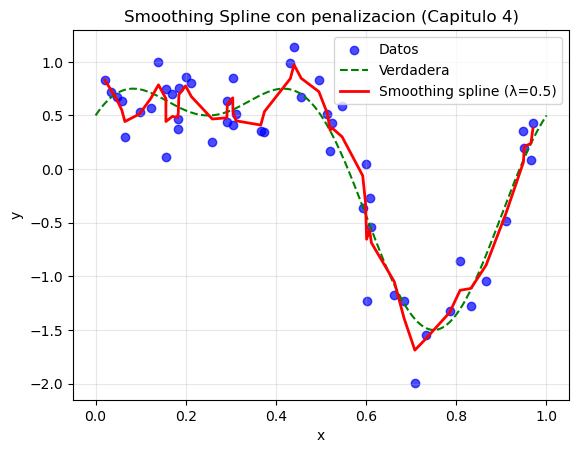

In [34]:
lambda_smooth = 0.5 # Prueba 0.001, 0.01, 0.1, 1

y_fit, beta = smoothing_spline(x, y, lambda_smooth)

plt.Figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Datos')
plt.plot(x_test, y_true, 'g--', label='Verdadera')
plt.plot(x, y_fit, 'r', linewidth=2, label=f'Smoothing spline (λ={lambda_smooth})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Smoothing Spline con penalizacion (Capitulo 4)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()